# MNIST using NN

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing

In [3]:
# source: https://www.kaggle.com/c/digit-recognizer/data
df = pd.read_csv('./digit-recognizer/train.csv')
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = df['label']
df_train = df.drop(columns=['label'])
x_train = df_train.to_numpy()

x_train.shape

(42000, 784)

label:  0


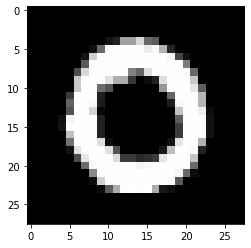

In [5]:
# Жишээ дата
data_id = 1
print('label: ', y_train[data_id])
plt.imshow(x_train[data_id].reshape(28,28), cmap='Greys_r')
plt.show()

In [6]:
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train)

In [7]:
# train test split
train_x = x_train[:-100, :]
test_x = x_train[-100:, :]


train_y = y_train[:-100]
test_y = y_train[-100:]

print(train_x.shape)
print(test_x.shape)


# [[2, 3 ]
#  [4, -1]] -> 2x2 -> [4]

torch.Size([41900, 784])
torch.Size([100, 784])


In [ ]:
model = nn.Sequential(
            nn.Linear(784,300), # nn.conv2d(in_channel=1, out_channel=3, kernel_size=5, stride=1, padding=1) #narrow vs same
            # nn.MaxPool2d()
            nn.ReLU(),
            nn.Linear(300,100), #
            nn.ReLU(),
            nn.Linear(100,10),  #
            nn.Softmax()
        )
# 784D -> 300D -> 100D -> 10D
print(model)

# hyperparameters
lr=1e-1
batch_size = 256
n_epoch = 30

# Data loader
train = TensorDataset(train_x, train_y)
train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
# Mean Squared Error -> Loss ------------- < Cross Entropy Loss
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr) # Adam, RMSProp

In [ ]:
train_history = []
print('training...')
for epoch in range(1, n_epoch + 1):
    train_loss = 0
    for xb, yb in train_loader: # getting data by batch size
        
        optimizer.zero_grad()
        output = model(xb) # outputs 10
        loss = criterian(output, yb) #
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*yb.shape[0]
        
    train_loss = train_loss/x_train.size()[0]
    train_history.append(train_loss)
    print(f"e {epoch}: {train_loss}")
    
    # pred = model(val)
    # loss = criterian(pred, y_val)
    # print('val loss:', loss)

In [ ]:
# plotting the trianing loss
plt.plot(range(1, n_epoch + 1), train_history)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('MNIST on Feedforward NN')
plt.show()

In [ ]:
pred = model(test_x)

pred_ids = pred.argmax(1)
print(pred_ids)

In [ ]:
# Жишээ дата
data_id = 19
print("predicted: ", pred_ids[data_id].item())
# print(test_x[data_id].view(28,28))
plt.imshow(test_x[data_id].view(28,28), cmap='Greys_r')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'test.pt')
print("model saved!")

# Inference

In [13]:
import cv2
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:


model = nn.Sequential(
            nn.Linear(784,300), # nn.conv2d(in_channel=1, out_channel=3, kernel_size=5, stride=1, padding=1) #narrow vs same
            # nn.MaxPool2d()
            nn.ReLU(),
            nn.Linear(300,100), #
            nn.ReLU(),
            nn.Linear(100,10),  #
            nn.Softmax()
        )

PATH = "test.pt"
model.load_state_dict(torch.load(PATH))
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=10, bias=True)
  (5): Softmax(dim=None)
)

In [8]:
pred = model(test_x)
pred_ids = pred.argmax(1)
print(pred_ids)

tensor([4, 9, 2, 8, 1, 5, 5, 5, 7, 8, 6, 1, 5, 6, 9, 5, 8, 2, 3, 8, 8, 6, 7, 9,
        4, 5, 1, 6, 5, 8, 0, 2, 1, 1, 7, 3, 1, 2, 1, 1, 4, 5, 8, 4, 9, 7, 9, 4,
        8, 7, 4, 1, 1, 4, 1, 3, 4, 7, 2, 9, 1, 8, 9, 2, 8, 2, 4, 6, 0, 9, 2, 3,
        4, 4, 3, 9, 2, 4, 4, 4, 7, 2, 8, 7, 3, 3, 0, 5, 0, 5, 3, 1, 9, 6, 4, 0,
        1, 7, 6, 9])


/Users/bayartsogtyadamsuren/DDAM-Projects/isid/myenv/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


predicted:  5


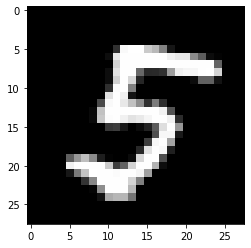

In [9]:
# Жишээ дата
data_id = 12
print("predicted: ", pred_ids[data_id].item())
# print(test_x[data_id].view(28,28))
plt.imshow(test_x[data_id].view(28,28), cmap='Greys_r')
plt.show()

In [52]:
from PIL import Image

In [115]:
im = Image.open("/Users/bayartsogtyadamsuren/Public/Document_backup/NMIT/image-processing/image-processing-labs/end-project/tsogoo/final_project_mnist/mnist/template/static/public/img.png")
# im = im.resize((28, 28))
im = np.array(im)[...,3]# .resize(28, 28)
print(im.shape)
test_tensor = torch.tensor(im.reshape(1, 28 * 28), dtype=torch.float32)

pred = model(test_tensor)
print(pred)
pred_ids = pred.argmax(1)
print(pred_ids)

(200, 200)


ValueError: cannot reshape array of size 40000 into shape (1,784)

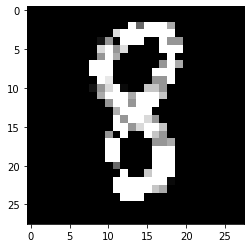

In [105]:
plt.imshow(im, cmap='Greys_r')

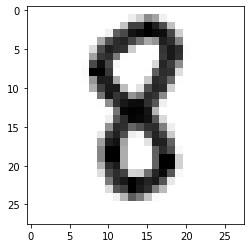

In [130]:
im = cv2.imread("/Users/bayartsogtyadamsuren/Public/Document_backup/NMIT/image-processing/image-processing-labs/end-project/tsogoo/final_project_mnist/mnist/template/static/public/img.png", cv2.IMREAD_UNCHANGED)
im = cv2.resize(im, (28, 28), interpolation = cv2.INTER_AREA)
plt.imshow(im, cmap='Greys_r')

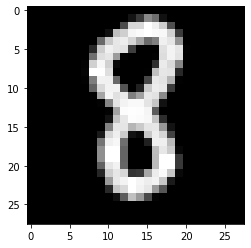

In [131]:
plt.imshow(im[...,3], cmap='Greys_r')